In [10]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Homework 04 - show outliers

In [11]:
import csv 

In [12]:
import os

In [13]:
import matplotlib.pyplot as plt 

In [14]:
import re

In [15]:
# definitions/parameters
DATA_FOLDER = '../data'
CSV_FILE_NAME = 'denver_neighborhoods.csv'

# Google drive mount
# drive.mount('/content/drive')

In [16]:
# Refresher on F Strings:
#   https://www.freecodecamp.org/news/python-new-line-and-how-to-python-print-without-a-newline/
# Referenced original repo & README often:
#   https://github.com/thyagomota/21FCS390Z/blob/main/hwk_04_denver_neighborhoods/src/show_outliers.py
# Referenced this to understand I was interacting with dictionary elements:
#   http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
# Referenced documentation multiple times
#   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
# Referenced peer to understand first #to do (not intentional, lingering from activity11)
#   Robert Koning
# Further reinforced understanding that boxplot can be accessed as dictionary
#   https://stackoverflow.com/questions/23349626/getting-data-of-a-box-plot-matplotlib

In [17]:
def min_max(data, mins, maxs, interval=(0,1)):
    return [ int(((data[i] - mins[i]) / (maxs[i] - mins[i]) * (interval[1] - interval[0]) + interval[0]) * 100000) / 100000 for i in range(len(data))]

Hilltop has homes priced much higher compared to others. 
	Normalized compare: Hilltop 0.75735 vs. maximum 0.32767
Country Club has homes priced much higher compared to others. 
	Normalized compare: Country Club 1.0 vs. maximum 0.32767
Was. Park has homes priced much higher compared to others. 
	Normalized compare: Was. Park 0.47778 vs. maximum 0.32767
Hampden is much more populated compared to the others. 
	Normalized compare: Hampden 1.0 vs. maximum 0.92664
Virginia Village has a school score average much lower compared to others. 
	Normalized compare: Virginia Village 0.0 vs. minimum 0.25


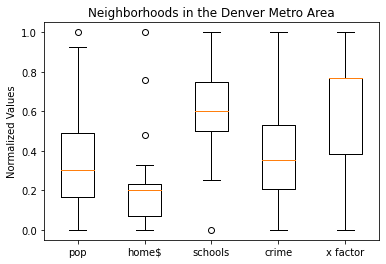

In [18]:
if __name__ == "__main__":

    matrix = []
    neighborhoods = []
    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'rt') as csv_file:
        reader = csv.reader(csv_file)
        row_count = 0
        for row in reader:
            row_count += 1
            if row_count == 1:
                continue
            row[0] = re.sub('Washington', 'Was.', row[0])
            row[0] = re.sub('South', 'S.', row[0])
            neighborhoods.append(row[0])
            data = [int(row[1]), int(row[2]), float(row[3]), int(row[4]), float(row[5])]
            if row_count == 2:
                mins = list(data)
                maxs = list(data)
            else:
                for i in range(len(data)):
                    mins[i] = min(mins[i], data[i])
                    maxs[i] = max(maxs[i], data[i])
            matrix.append(data)

    # print(mins)
    # print(maxs)
    matrix = [min_max(data, mins, maxs) for data in matrix]
    # print(matrix)

    columns = [[], [], [], [], []]
    for data in matrix:
        for i in range(5):
            columns[i].append(data[i])
    bp = plt.boxplot(columns)
    axes = plt.gca()
    col_labels = ['pop', 'home$', 'schools', 'crime', 'x factor']
    axes.set_xticklabels(col_labels)
    plt.title('Neighborhoods in the Denver Metro Area')
    plt.ylabel('Normalized Values')

    # TODO: evaluate outliers in population
    pop_min_outlier_txt = "is much less populated compared to the others."
    pop_max_outlier_txt = "is much more populated compared to the others."
    home_price_min_outlier_txt = "has homes priced much lower compared to others."
    home_price_max_outlier_txt = "has homes priced much higher compared to others."
    school_score_min_outlier_txt = "has a school score average much lower compared to others."
    school_score_max_outlier_txt = "has a school score average much higher compared to others."
    crime_rate_min_outlier_txt = "has a crime rate much lower compared to others."
    crime_rate_max_outlier_txt = "has a crime rate much higher compared to others."
    x_factor_min_outlier_txt = "has an x factor much lower compared to others."
    x_factor_max_outlier_txt = "has an x factor much higher compared to others."

    min_txt_list = [pop_min_outlier_txt, home_price_min_outlier_txt, school_score_min_outlier_txt, crime_rate_min_outlier_txt, x_factor_min_outlier_txt]
    max_txt_list = [pop_max_outlier_txt, home_price_max_outlier_txt, school_score_max_outlier_txt, crime_rate_max_outlier_txt, x_factor_max_outlier_txt]

    plot_norm_min = []
    plot_norm_max = []
    counter = 0
    for whisker in bp['whiskers']:
        if counter % 2 == 0:
            plot_norm_min.append(whisker.get_xydata()[1][1])
        elif counter % 2 == 1:
            plot_norm_max.append(whisker.get_xydata()[1][1])
        counter += 1

    min_outliers = []
    max_outliers = []
    index = 0
    for row in matrix:
        neighborhood = neighborhoods[index]
        for inner_index in range(len(row)):
            if row[inner_index] < plot_norm_min[inner_index]:
                compare_txt = neighborhood + ' ' + str(row[inner_index]) + ' ' + 'vs. minimum' + \
                              ' ' + str(plot_norm_min[inner_index])
                print(f"{neighborhood} {min_txt_list[inner_index]} \n\tNormalized compare: {compare_txt}")
            elif row[inner_index] > plot_norm_max[inner_index]:
                compare_txt = neighborhood + ' ' + str(row[inner_index]) + ' ' + 'vs. maximum' + \
                              ' ' + str(plot_norm_max[inner_index])
                print(f"{neighborhood} {max_txt_list[inner_index]} \n\tNormalized compare: {compare_txt}")
        index += 1
    plt.show()